In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('worldhappinessreport2020.csv')
df.head(10)

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Western Europe,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Western Europe,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880
7,New Zealand,North America and ANZ,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
8,Austria,Western Europe,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Western Europe,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084


In [4]:
df.shape

(153, 8)

In [8]:
df['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [23]:
SEAsia = [df['Regional indicator'] == 'Southeast Asia'] # True / False for Region column
SEAsia

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 148    False
 149    False
 150    False
 151    False
 152    False
 Name: Regional indicator, Length: 153, dtype: bool]

In [24]:
SEAsia = df[df['Regional indicator'] == 'Southeast Asia'] # select the relevant rows 
SEAsia 

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
30,Singapore,Southeast Asia,11.395521,0.910269,76.804581,0.926645,0.029879,0.109784
51,Philippines,Southeast Asia,8.993546,0.846730,61.926762,0.915463,-0.105463,0.733634
53,Thailand,Southeast Asia,9.741792,0.889973,67.250595,0.905063,0.268685,0.886272
81,Malaysia,Southeast Asia,10.262519,0.816509,67.102158,0.894627,0.114727,0.839302
82,Vietnam,Southeast Asia,8.809546,0.849987,67.952736,0.939593,-0.094533,0.796421
83,Indonesia,Southeast Asia,9.369752,0.808380,62.155849,0.870614,0.519587,0.876296
103,Laos,Southeast Asia,8.798580,0.737502,58.709923,0.907214,0.111371,0.634679
105,Cambodia,Southeast Asia,8.249890,0.773081,61.529968,0.959705,0.051911,0.822769
132,Myanmar,Southeast Asia,8.680482,0.784407,58.961712,0.895075,0.560664,0.645124


<AxesSubplot:title={'center':'Southeast Asia GDP per capita'}, xlabel='Country name'>

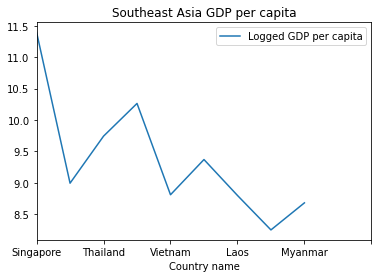

In [25]:
SEAsia.plot(x='Country name', y='Logged GDP per capita', title='Southeast Asia GDP per capita', xlim=(0,10))

<AxesSubplot:title={'center':'Southeast Asia GDP per capita'}, ylabel='Country name'>

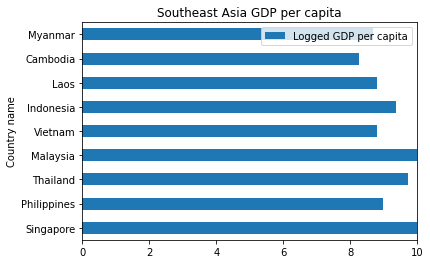

In [26]:
SEAsia.plot(x='Country name', y='Logged GDP per capita', kind='barh', title='Southeast Asia GDP per capita', xlim=(0,10))

## Mean life expectancy for each region

In [32]:
mean_lifeexpectancy = {}  
allregions =  df['Regional indicator'].unique()

for r in allregions:
    oneregion = df[df['Regional indicator']== r ]
    region_mean = oneregion['Healthy life expectancy'].mean() #2. Apply a mean() function to each group - calc mean life expectancy
    mean_lifeexpectancy[r] = region_mean #3. Combine the results into one data structure.

mean_lifeexpectancy

{'Western Europe': 72.86356499095237,
 'North America and ANZ': 72.17706680250001,
 'Middle East and North Africa': 65.31361119882354,
 'Latin America and Caribbean': 66.71732838952381,
 'Central and Eastern Europe': 68.14898793941177,
 'East Asia': 71.09484672500001,
 'Southeast Asia': 64.71047592111113,
 'Commonwealth of Independent States': 64.72655805,
 'Sub-Saharan Africa': 55.09159117564103,
 'South Asia': 62.448661802857146}

In [33]:
df['Regional indicator'].value_counts() # number of regions & number of unique values in each region for entire df

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [65]:
grouped = df.groupby('Regional indicator')
grouped.size()

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           21
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    39
Western Europe                        21
dtype: int64

In [66]:
means = grouped.mean()
means   # index (Regional indicator)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,
Central and Eastern Europe,9.975703,0.874566,68.148988,0.770271,-0.102712,0.850859
Commonwealth of Independent States,9.207234,0.856729,64.726558,0.784004,-0.041285,0.746387
East Asia,10.316895,0.859852,71.094847,0.761027,-0.051978,0.702266
Latin America and Caribbean,9.303024,0.856891,66.717328,0.830684,-0.071901,0.801526
Middle East and North Africa,9.713648,0.796720,65.313611,0.710171,-0.084426,0.761510
North America and ANZ,10.709919,0.933842,72.177067,0.907045,0.164180,0.431717
South Asia,8.559491,0.708996,62.448662,0.771805,0.035106,0.790656
Southeast Asia,9.366847,0.824093,64.710476,0.912667,0.161870,0.704920
Sub-Saharan Africa,7.904056,0.681972,55.091591,0.719702,0.002383,0.770404


In [68]:
corrupt_grouped = grouped['Perceptions of corruption']
corrupt_mean = corrupt_grouped.mean()
corrupt_mean

Regional indicator
Central and Eastern Europe            0.850859
Commonwealth of Independent States    0.746387
East Asia                             0.702266
Latin America and Caribbean           0.801526
Middle East and North Africa          0.761510
North America and ANZ                 0.431717
South Asia                            0.790656
Southeast Asia                        0.704920
Sub-Saharan Africa                    0.770404
Western Europe                        0.528730
Name: Perceptions of corruption, dtype: float64

In [75]:
              # index                      <<         values    >>
df.groupby('Regional indicator')['Perceptions of corruption'].mean()  # shorten code..... (same as above)

Regional indicator
Central and Eastern Europe            0.850859
Commonwealth of Independent States    0.746387
East Asia                             0.702266
Latin America and Caribbean           0.801526
Middle East and North Africa          0.761510
North America and ANZ                 0.431717
South Asia                            0.790656
Southeast Asia                        0.704920
Sub-Saharan Africa                    0.770404
Western Europe                        0.528730
Name: Perceptions of corruption, dtype: float64

## aggregate agg()

In [70]:
corrupt_grouped.agg([np.min, np.mean, np.max])

,amin,mean,amax
Regional indicator,,,
Central and Eastern Europe,0.623074,0.850859,0.935585
Commonwealth of Independent States,0.501497,0.746387,0.920637
East Asia,0.420607,0.702266,0.863511
Latin America and Caribbean,0.635994,0.801526,0.912231
Middle East and North Africa,0.594502,0.761510,0.902256
North America and ANZ,0.221139,0.431717,0.699715
South Asia,0.661844,0.790656,0.933687
Southeast Asia,0.109784,0.704920,0.886272
Sub-Saharan Africa,0.183541,0.770404,0.891807


## How varied are the perceptions of corruption in each region? 

In [73]:
def calc(group): # custom function to aggregate 'Perceptions of corruption' data
    return (group.max() - group.min())

corrupt_grouped.agg(calc)

Regional indicator
Central and Eastern Europe            0.312511
Commonwealth of Independent States    0.419139
East Asia                             0.442904
Latin America and Caribbean           0.276236
Middle East and North Africa          0.307754
North America and ANZ                 0.478576
South Asia                            0.271843
Southeast Asia                        0.776488
Sub-Saharan Africa                    0.708265
Western Europe                        0.724140
Name: Perceptions of corruption, dtype: float64

# Pivot table

In [81]:
gdp_df = df.pivot_table(values='Logged GDP per capita', index='Regional indicator', aggfunc=np.mean, margins=True) # margins=True - gets All 
gdp_df

,Logged GDP per capita
Regional indicator,
Central and Eastern Europe,9.975703
Commonwealth of Independent States,9.207234
East Asia,10.316895
Latin America and Caribbean,9.303024
Middle East and North Africa,9.713648
North America and ANZ,10.709919
South Asia,8.559491
Southeast Asia,9.366847
Sub-Saharan Africa,7.904056


In [82]:
df['Logged GDP per capita'].mean()

9.295705839

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Regional indicator'>

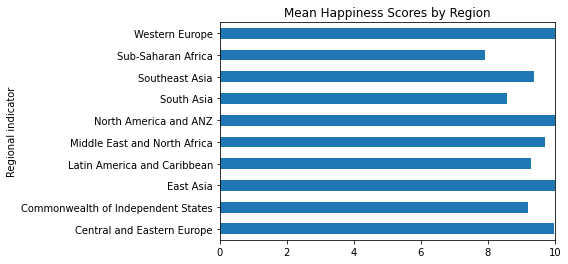

In [80]:
gdp_df.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

In [84]:
df.pivot_table(['Healthy life expectancy','Logged GDP per capita'], 'Regional indicator')

,Healthy life expectancy,Logged GDP per capita
Regional indicator,,
Central and Eastern Europe,68.148988,9.975703
Commonwealth of Independent States,64.726558,9.207234
East Asia,71.094847,10.316895
Latin America and Caribbean,66.717328,9.303024
Middle East and North Africa,65.313611,9.713648
North America and ANZ,72.177067,10.709919
South Asia,62.448662,8.559491
Southeast Asia,64.710476,9.366847
Sub-Saharan Africa,55.091591,7.904056


In [86]:
df.pivot_table('Healthy life expectancy','Regional indicator', aggfunc=[np.min, np.mean, np.max], margins=True)

,amin,mean,amax
,Healthy life expectancy,Healthy life expectancy,Healthy life expectancy
Regional indicator,,,
Central and Eastern Europe,63.885555,68.148988,71.102989
Commonwealth of Independent States,62.211708,64.726558,66.750656
East Asia,62.304485,71.094847,76.771706
Latin America and Caribbean,55.598625,66.717328,71.299850
Middle East and North Africa,56.727283,65.313611,73.200256
North America and ANZ,68.299500,72.177067,73.604538
South Asia,52.590000,62.448662,70.599998
Southeast Asia,58.709923,64.710476,76.804581


## Method 1: pivot table

In [97]:
happy_life_gdp = df.pivot_table(['Healthy life expectancy','Logged GDP per capita'], 'Regional indicator', aggfunc=[np.min, np.mean, np.max], margins=True)
happy_life_gdp

amin  \
                                   Healthy life expectancy   
Regional indicator                                           
Central and Eastern Europe                       63.885555   
Commonwealth of Independent States               62.211708   
East Asia                                        62.304485   
Latin America and Caribbean                      55.598625   
Middle East and North Africa                     56.727283   
North America and ANZ                            68.299500   
South Asia                                       52.590000   
Southeast Asia                                   58.709923   
Sub-Saharan Africa                               45.200001   
Western Europe                                   71.900825   
All                                              45.200001   

                                                          \
                                   Logged GDP per capita   
Regional indicator                                         
Central and Eastern Europe                      9.204430   
Commonwealth of Independent States              8.024811   
East Asia                                       9.412187   
Latin America and Caribbean                     7.411329   
Middle East and North Africa                    7.759683   
North America and ANZ                          10.500943   
South Asia                                      7.462861   
Southeast Asia                                  8.249890   
Sub-Saharan Africa                              6.492642   
Western Europe                                 10.132326   
All                                             6.492642   

                                                      mean  \
                                   Healthy life expectancy   
Regional indicator                                           
Central and Eastern Europe                       68.148988   
Commonwealth of Independent States               64.726558   
East Asia                                        71.094847   
Latin America and Caribbean                      66.717328   
Middle East and North Africa                     65.313611   
North America and ANZ                            72.177067   
South Asia                                       62.448662   
Southeast Asia                                   64.710476   
Sub-Saharan Africa                               55.091591   
Western Europe                                   72.863565   
All                                              64.445529   

                                                          \
                                   Logged GDP per capita   
Regional indicator                                         
Central and Eastern Europe                      9.975703   
Commonwealth of Independent States              9.207234   
East Asia                                      10.316895   
Latin America and Caribbean                     9.303024   
Middle East and North Africa                    9.713648   
North America and ANZ                          10.709919   
South Asia                                      8.559491   
Southeast Asia                                  9.366847   
Sub-Saharan Africa                              7.904056   
Western Europe                                 10.688402   
All                                             9.295706   

                                                      amax  \
                                   Healthy life expectancy   
Regional indicator                                           
Central and Eastern Europe                       71.102989   
Commonwealth of Independent States               66.750656   
East Asia                                        76.771706   
Latin America and Caribbean                      71.299850   
Middle East and North Africa                     73.200256   
North America and ANZ                            73.604538   
South Asia                                       70.599998   
Southeast Asia

## Method 2: groupby

In [95]:
grouped = df.groupby('Regional indicator')[['Logged GDP per capita', 'Healthy life expectancy']]   # result from code is same as above 
happy_gdp_life = grouped.agg([np.min,np.mean,np.max])
happy_gdp_life

Logged GDP per capita             \
                                                    amin       mean   
Regional indicator                                                    
Central and Eastern Europe                      9.204430   9.975703   
Commonwealth of Independent States              8.024811   9.207234   
East Asia                                       9.412187  10.316895   
Latin America and Caribbean                     7.411329   9.303024   
Middle East and North Africa                    7.759683   9.713648   
North America and ANZ                          10.500943  10.709919   
South Asia                                      7.462861   8.559491   
Southeast Asia                                  8.249890   9.366847   
Sub-Saharan Africa                              6.492642   7.904056   
Western Europe                                 10.132326  10.688402   

                                              Healthy life expectancy  \
                                         amax                    amin   
Regional indicator                                                      
Central and Eastern Europe          10.404163               63.885555   
Commonwealth of Independent States  10.128872               62.211708   
East Asia                           10.934671               62.304485   
Latin America and Caribbean         10.260002               55.598625   
Middle East and North Africa        11.109999               56.727283   
North America and ANZ               10.925769               68.299500   
South Asia                           9.518633               52.590000   
Southeast Asia                      11.395521               58.709923   
Sub-Saharan Africa                   9.956786               45.200001   
Western Europe                      11.450681               71.900825   

                                                          
                                         mean       amax  
Regional indicator                                        
Central and Eastern Europe          68.148988  71.102989  
Commonwealth of Independent States  64.726558  66.750656  
East Asia                           71.094847  76.771706  
Latin America and Caribbean         66.717328  71.299850  
Middle East and North Africa        65.313611  73.200256  
North America and ANZ               72.177067  73.604538  
South Asia                          62.448662  70.599998  
Southeast Asia                      64.710476  76.804581  
Sub-Saharan Africa                  55.091591  66.404343  
Western Europe                      72.863565  74.402710

In [93]:
grouped = df.groupby('Regional indicator')[['Logged GDP per capita', 'Healthy life expectancy']].agg([np.min,np.mean,np.max])
grouped

Logged GDP per capita             \
                                                    amin       mean   
Regional indicator                                                    
Central and Eastern Europe                      9.204430   9.975703   
Commonwealth of Independent States              8.024811   9.207234   
East Asia                                       9.412187  10.316895   
Latin America and Caribbean                     7.411329   9.303024   
Middle East and North Africa                    7.759683   9.713648   
North America and ANZ                          10.500943  10.709919   
South Asia                                      7.462861   8.559491   
Southeast Asia                                  8.249890   9.366847   
Sub-Saharan Africa                              6.492642   7.904056   
Western Europe                                 10.132326  10.688402   

                                              Healthy life expectancy  \
                                         amax                    amin   
Regional indicator                                                      
Central and Eastern Europe          10.404163               63.885555   
Commonwealth of Independent States  10.128872               62.211708   
East Asia                           10.934671               62.304485   
Latin America and Caribbean         10.260002               55.598625   
Middle East and North Africa        11.109999               56.727283   
North America and ANZ               10.925769               68.299500   
South Asia                           9.518633               52.590000   
Southeast Asia                      11.395521               58.709923   
Sub-Saharan Africa                   9.956786               45.200001   
Western Europe                      11.450681               71.900825   

                                                          
                                         mean       amax  
Regional indicator                                        
Central and Eastern Europe          68.148988  71.102989  
Commonwealth of Independent States  64.726558  66.750656  
East Asia                           71.094847  76.771706  
Latin America and Caribbean         66.717328  71.299850  
Middle East and North Africa        65.313611  73.200256  
North America and ANZ               72.177067  73.604538  
South Asia                          62.448662  70.599998  
Southeast Asia                      64.710476  76.804581  
Sub-Saharan Africa                  55.091591  66.404343  
Western Europe                      72.863565  74.402710

## Countries in Western Europe df

In [38]:
# select the data for just the Western Europe group

eu = df.groupby('Regional indicator')
eu.get_group('Western Europe')

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Western Europe,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Western Europe,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880
8,Austria,Western Europe,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Western Europe,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084
12,United Kingdom,Western Europe,10.600135,0.936683,72.301605,0.834744,0.263732,0.435916


In [41]:
grouped = df.groupby('Regional indicator')
grouped.groups
 # GroupBy.groups attribute get more information about the GroupBy object (Regional indicator)

{'Central and Eastern Europe': [18, 32, 34, 36, 40, 42, 46, 50, 52, 56, 63, 68, 71, 78, 89, 95, 104], 'Commonwealth of Independent States': [37, 49, 69, 70, 72, 73, 74, 88, 94, 115, 116, 122], 'East Asia': [24, 60, 61, 77, 80, 93], 'Latin America and Caribbean': [14, 23, 25, 28, 31, 33, 35, 38, 41, 43, 45, 54, 55, 57, 59, 62, 64, 66, 67, 98, 141], 'Middle East and North Africa': [13, 20, 26, 39, 47, 79, 92, 96, 99, 109, 110, 117, 118, 124, 127, 137, 145], 'North America and ANZ': [7, 10, 11, 17], 'South Asia': [65, 86, 91, 106, 129, 143, 152], 'Southeast Asia': [30, 51, 53, 81, 82, 83, 103, 105, 132], 'Sub-Saharan Africa': [48, 84, 85, 87, 90, 97, 100, 101, 102, 107, 108, 111, 112, 113, 114, 119, 120, 121, 123, 125, 126, 128, 130, 131, 133, 134, 135, 136, 138, 139, 140, 142, 144, 146, 147, 148, 149, 150, 151], 'Western Europe': [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 16, 19, 21, 22, 27, 29, 44, 58, 75, 76]}

In [42]:
eu.groups # # GroupBy.groups attribute get more information about the GroupBy object (Regional indicator)

{'Central and Eastern Europe': [18, 32, 34, 36, 40, 42, 46, 50, 52, 56, 63, 68, 71, 78, 89, 95, 104], 'Commonwealth of Independent States': [37, 49, 69, 70, 72, 73, 74, 88, 94, 115, 116, 122], 'East Asia': [24, 60, 61, 77, 80, 93], 'Latin America and Caribbean': [14, 23, 25, 28, 31, 33, 35, 38, 41, 43, 45, 54, 55, 57, 59, 62, 64, 66, 67, 98, 141], 'Middle East and North Africa': [13, 20, 26, 39, 47, 79, 92, 96, 99, 109, 110, 117, 118, 124, 127, 137, 145], 'North America and ANZ': [7, 10, 11, 17], 'South Asia': [65, 86, 91, 106, 129, 143, 152], 'Southeast Asia': [30, 51, 53, 81, 82, 83, 103, 105, 132], 'Sub-Saharan Africa': [48, 84, 85, 87, 90, 97, 100, 101, 102, 107, 108, 111, 112, 113, 114, 119, 120, 121, 123, 125, 126, 128, 130, 131, 133, 134, 135, 136, 138, 139, 140, 142, 144, 146, 147, 148, 149, 150, 151], 'Western Europe': [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 16, 19, 21, 22, 27, 29, 44, 58, 75, 76]}

In [52]:
df.iloc[11:14]

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Australia,North America and ANZ,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169
12,United Kingdom,Western Europe,10.600135,0.936683,72.301605,0.834744,0.263732,0.435916
13,Israel,Middle East and North Africa,10.417525,0.913571,73.200256,0.747581,0.102594,0.780855


In [59]:
northamerica = df.iloc[[7,10,11,17]] # 'North America and ANZ': [7, 10, 11, 17]
northamerica

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,New Zealand,North America and ANZ,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
10,Canada,North America and ANZ,10.692369,0.927177,73.601601,0.933913,0.124771,0.390843
11,Australia,North America and ANZ,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169
17,United States,North America and ANZ,10.925769,0.914219,68.299500,0.842620,0.149892,0.699715


# get_group()

In [64]:
# GroupBy.get_group() method to select the data for the North America group only.
grouped = df.groupby('Regional indicator')
grouped.groups

na_group = grouped.get_group('North America and ANZ')
na_group

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,New Zealand,North America and ANZ,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
10,Canada,North America and ANZ,10.692369,0.927177,73.601601,0.933913,0.124771,0.390843
11,Australia,North America and ANZ,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169
17,United States,North America and ANZ,10.925769,0.914219,68.299500,0.842620,0.149892,0.699715


In [5]:
needless_cols = ['Regional indicator', 'Generosity', 'Perceptions of corruption']

In [5]:
df.drop(needless_cols, axis=1, inplace=True)
df.head(7)

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.639267,0.954330,71.900825,0.949172
1,Denmark,10.774001,0.955991,72.402504,0.951444
2,Switzerland,10.979933,0.942847,74.102448,0.921337
3,Iceland,10.772559,0.974670,73.000000,0.948892
4,Norway,11.087804,0.952487,73.200783,0.955750
5,Netherlands,10.812712,0.939139,72.300919,0.908548
6,Sweden,10.758794,0.926311,72.600769,0.939144


In [6]:
df.set_index('Country name', inplace=True)

In [7]:
df.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.639267,0.954330,71.900825,0.949172
Denmark,10.774001,0.955991,72.402504,0.951444
Switzerland,10.979933,0.942847,74.102448,0.921337
Iceland,10.772559,0.974670,73.000000,0.948892
Norway,11.087804,0.952487,73.200783,0.955750


In [8]:
countrydf = pd.read_csv('country_wise_latest.csv')
countrydf.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [9]:
countrydf.shape

(187, 15)

In [10]:
casesdf = countrydf.loc[:187, 'Country/Region' : 'Confirmed']

In [11]:
casesdf.set_index('Country/Region', inplace=True)

In [12]:
casesdf

,Confirmed
Country/Region,
Afghanistan,36263
Albania,4880
Algeria,27973
Andorra,907
Angola,950
...,...
West Bank and Gaza,10621
Western Sahara,10
Yemen,1691


In [13]:
finaldata = casesdf.join(df, how="inner")
finaldata.head()

,Confirmed,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,36263,7.462861,0.470367,52.590000,0.396573
Albania,4880,9.417931,0.671070,68.708138,0.781994
Algeria,27973,9.537965,0.803385,65.905174,0.466611
Argentina,167416,9.810955,0.900568,68.803802,0.831132
Armenia,37390,9.100476,0.757479,66.750656,0.712018


In [14]:
finaldata.corr() # correlation matrix

,Confirmed,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Confirmed,1.000000,0.107334,0.053583,0.068381,0.049062
Logged GDP per capita,0.107334,1.000000,0.785436,0.859843,0.425420
Social support,0.053583,0.785436,1.000000,0.759661,0.483890
Healthy life expectancy,0.068381,0.859843,0.759661,1.000000,0.458914
Freedom to make life choices,0.049062,0.425420,0.483890,0.458914,1.000000


&lt;AxesSubplot:xlabel=&#39;Logged GDP per capita&#39;, ylabel=&#39;Confirmed&#39;&gt;

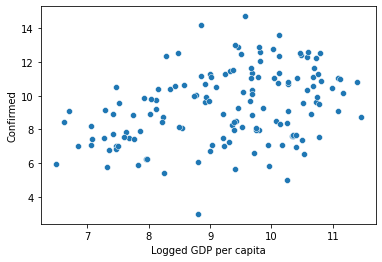

In [15]:
x= finaldata['Logged GDP per capita'] # correlation of GDP and confirmed covid-19
y= finaldata['Confirmed']
sns.scatterplot(x, np.log(y))

&lt;AxesSubplot:xlabel=&#39;Logged GDP per capita&#39;, ylabel=&#39;Confirmed&#39;&gt;

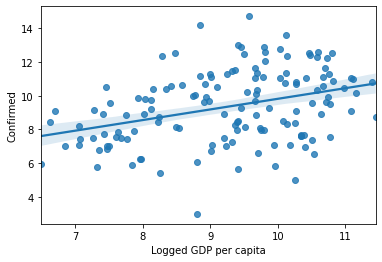

In [16]:
sns.regplot(x, np.log(y)) # regression plot: correlation of GDP and confirmed covid-19

&lt;AxesSubplot:xlabel=&#39;Social support&#39;, ylabel=&#39;Confirmed&#39;&gt;

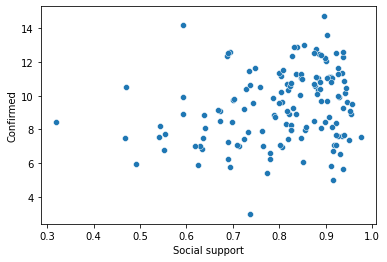

In [17]:
x= finaldata['Social support'] # correlation of Social support and confirmed covid-19
y= finaldata['Confirmed']
sns.scatterplot(x, np.log(y))

&lt;AxesSubplot:xlabel=&#39;Healthy life expectancy&#39;, ylabel=&#39;Confirmed&#39;&gt;

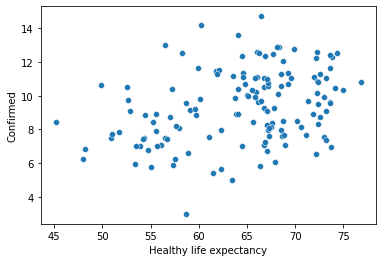

In [18]:
x= finaldata['Healthy life expectancy'] # correlation of Healthy life expectancy and confirmed covid-19
y= finaldata['Confirmed']
sns.scatterplot(x, np.log(y))